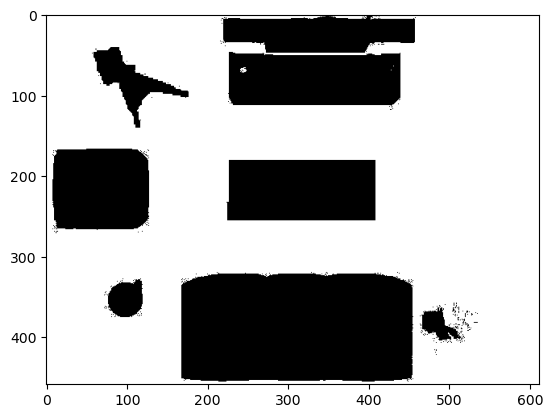

In [1]:
import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread("furn2-.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to binary with a threshold of 1
_, binary_image = cv2.threshold(gray_image, 252, 255, cv2.THRESH_BINARY)

cv2.imwrite('binary_image.jpg', binary_image)
#Show the image with matplotlib
plt.imshow(binary_image, cmap="gray")
plt.show()



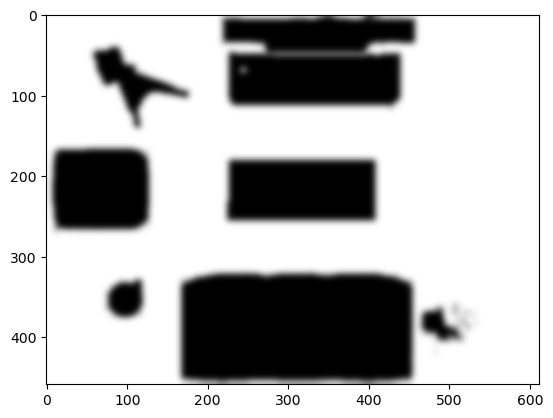

In [2]:
import cv2
import numpy as np
r = 10  # Example radius
sigma = r *1.2/ 3  # Example relation, adjust based on your needs

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(binary_image, (0, 0), sigmaX=sigma, sigmaY=sigma)
plt.imshow(blurred_image, cmap="gray")
plt.show()


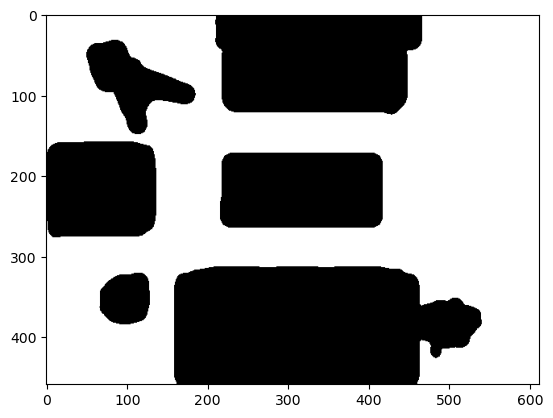

True

In [3]:
# Convert the grayscale image to binary with a threshold of 1
_, Final_image = cv2.threshold(blurred_image, 252, 255, cv2.THRESH_BINARY)
# cv2.imwrite(Final_image)
#Show the image with matplotlib
plt.imshow(Final_image, cmap="gray")
plt.show()
cv2.imwrite('Margin_Image_furn2.png', Final_image)


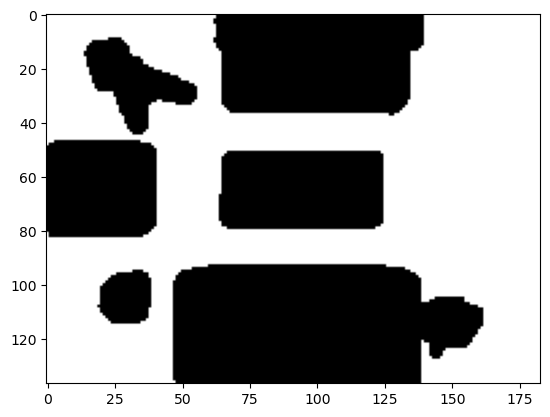

In [4]:
# Resize the image
# Define the scale factor. For example, 0.25 will reduce the size by half.
scale_factor = 0.3

# Calculate the new dimensions
width = int(Final_image.shape[1] * scale_factor)
height = int(Final_image.shape[0] * scale_factor)
new_dimensions = (width, height)

# Resize the image
resized_image = cv2.resize(Final_image, new_dimensions, interpolation=cv2.INTER_AREA)
_, resized_image = cv2.threshold(resized_image, 252, 255, cv2.THRESH_BINARY)

# Save the resized image
cv2.imwrite('map/resized_image.png', resized_image)
plt.imshow(resized_image, cmap="gray")
plt.show()

In [8]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Initialize global variables
start_point = None
end_point = None
start_point_record = []
end_point_record = []
drawing = False  # True if mouse is pressed
agent_num = 2
agent_current = 1
count = 0
agent_points = (agent_num,2)
# agent_position = zeros(agent_points)

# Define the mouse callback function
def select_points(event, x, y, flags, param):
    global start_point, end_point, drawing, count, agent_num, agent_current
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if count%2 == 0:
            start_point = (x , y)
            start_point_record.append(start_point)
            print("The Start Point of agent " + str(agent_current) + " is: ")
            print(start_point)
            cv2.circle(img2, start_point, radius=3, color=(0, 0, 255), thickness=-1)
        elif count%2 == 1:
            end_point = (x, y)
            end_point_record.append(end_point)
            print("The End Point of agent " + str(agent_current) + " is: ")
            print(end_point)
            cv2.circle(img2, end_point, radius=3, color=(0, 255, 0), thickness=-1)
            agent_current+=1
        
#         print(count)
        cv2.imshow('image', img2)
        
        count+=1
        
        

# Load an image
print("Please select start and end points for agents.")
img2 = cv2.imread('map/resized_image.png')

cv2.namedWindow('image')
cv2.setMouseCallback('image', select_points)

# Display the image
cv2.imshow('image', img2)



k = cv2.waitKey(0) & 0xff
if k == 27:
    print(k)
    cv2.destroyAllWindows()


Please select start and end points for agents.
The Start Point of agent 1 is: 
(151, 54)
The End Point of agent 1 is: 
(30, 127)
27


In [5]:
# Importing the required libraries
import sys
import argparse
import numpy as np
import math
from utils import move
import random
import matplotlib.pyplot as plt
from QuadMDP.QuadTree import Point, Rect
from QuadMDP.QuadMDP import QuadMDP
from utils.Obstacle import Obstacle, Agent
from utils.Global import Global
from utils.agent_graph import *
from matplotlib.animation import FuncAnimation
import time
import csv
from matplotlib.patches import Circle

Map Width: 137
Map height: 183


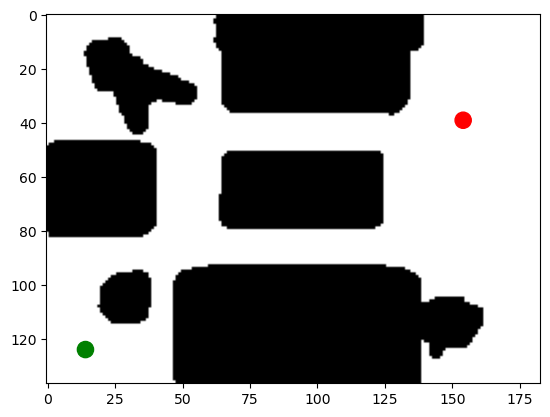

In [6]:
# Initializing the world from the picture
filename = 'resized_image.png'
image = plt.imread('map/' + filename)
mapWidth, mapHeight = image.shape
print("Map Width:", mapWidth)
print("Map height:", mapHeight)
mapDepth = (int)(math.log(mapWidth,2))
searchDepth = 2 # Search depth within QuadMDP

fig,ax = plt.subplots(1)

# Global class for the whole environment
g = Global((mapWidth,mapHeight))
ax.imshow(image, cmap="gray")

# startPos = start_point_record[0]
startPos = (154, 39)
# goalPos = end_point_record[0]
goalPos = (14, 124)
x_start,y_start = startPos
circ_start = Circle((x_start,y_start),scale_factor*r, color='r')
ax.add_patch(circ_start)
x_end,y_end = goalPos
circ_end = Circle((x_end,y_end),scale_factor*r, color='g')
ax.add_patch(circ_end)

# plt.show()




In [7]:
import sys
import argparse
import numpy as np
import math
from utils import move
import random
import matplotlib.pyplot as plt
from QuadMDP.QuadTree import Point, Rect
from QuadMDP.QuadMDP import QuadMDP
from utils.Obstacle import Obstacle, Agent
from utils.Global import Global
from utils.agent_graph import *
from matplotlib.animation import FuncAnimation
import time
import csv
from matplotlib.patches import Circle

Map Width: 137
Map height: 183


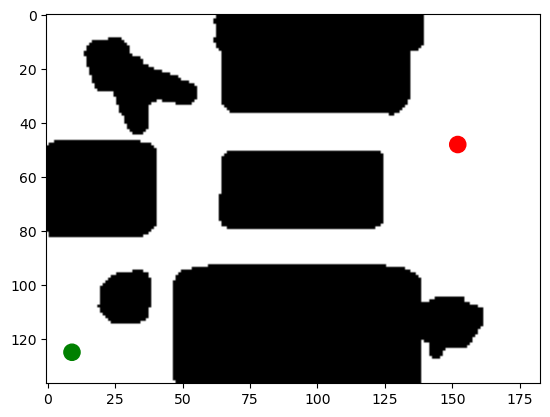

In [8]:
# Initializing the world from the picture
filename = 'resized_image.png'
image = plt.imread('map/' + filename)
mapWidth, mapHeight = image.shape
print("Map Width:", mapWidth)
print("Map height:", mapHeight)
mapDepth = (int)(math.log(mapWidth,2))
searchDepth = 2 # Search depth within QuadMDP

scale_factor = 0.3
startPos = (48,152)
goalPos = (125,9)
fig,ax = plt.subplots(1)

# Global class for the whole environment
g = Global((mapWidth,mapHeight))
ax.imshow(image, cmap="gray")

y_start,x_start = startPos
circ_start = Circle((x_start,y_start),scale_factor*r, color='r')
ax.add_patch(circ_start)
y_end,x_end = goalPos
circ_end = Circle((x_end,y_end),scale_factor*r, color='g')
ax.add_patch(circ_end)



In [9]:

# QuadMDP class for generating the quad decomposed states
quad = QuadMDP(Rect(mapWidth/2-0.5,mapHeight/2-0.5,mapWidth,mapHeight),mapDepth)



# Initialize time collection
times = [0] #first entry is time steps, second+third are realtime global path search

# Load all obstacles
for x in range(mapWidth):
    for y in range(mapHeight):
        if image[x,y] == 0:
            g.createObstacle(move.NONE,(x,y))
            quad.insert(Point(x,y,True))

# Generate quad decomposed states
S = quad.findEmptySpace(searchDepth)
graph = quad.generateGraph(S, searchDepth)

# Generate the start position and the goal

startQuadMDP = quad.findContainedQuadMDP(startPos)
goalQuadMDP = quad.findContainedQuadMDP(goalPos)

DFS = False  # set to True to use DFS instead of BFS
Simple = True

# Get the optimal path in the Quadtree representation

if DFS:  # DFS
    path_dfs = quad.getPathDFSV2(S,searchDepth,startQuadMDP,goalQuadMDP, path = [], visited = set())
    path = [element.getTuple() for element in path_dfs]
else:  # BFS
    times.append(time.perf_counter())
    path = quad.getOptimalPath(S,searchDepth,startQuadMDP.getTuple(),goalQuadMDP.getTuple())
    times.append(time.perf_counter())
path.append(goalPos)


# Projecting the path to the Global representation
for i, p in enumerate(path):
    decision = np.random.randint(0, 3)
    if decision == 0:
        path[i] = (math.floor(p[0]), math.floor(p[1]))
    if decision == 1:
        path[i] = (math.ceil(p[0]), math.floor(p[1]))
    if decision == 2:
        path[i] = (math.floor(p[0]), math.ceil(p[1]))
    if decision == 3:
        path[i] = (math.ceil(p[0]), math.ceil(p[1]))

print("Path we want to take: ", path)

Path we want to take:  [(51, 159), (47, 131), (46, 120), (46, 109), (47, 96), (46, 85), (47, 73), (46, 63), (47, 50), (55, 50), (64, 50), (73, 50), (80, 51), (82, 43), (90, 39), (90, 28), (89, 17), (89, 5), (97, 5), (107, 5), (115, 6), (127, 10), (125, 9)]


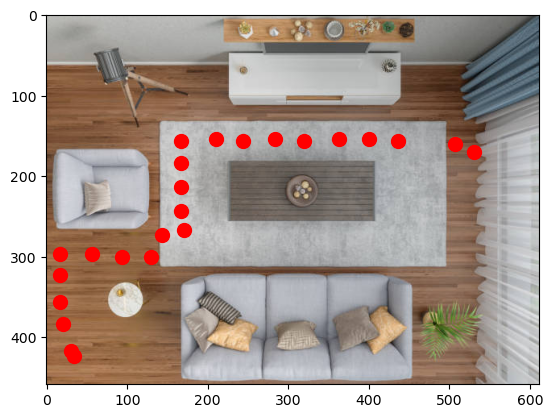

In [10]:
fig,ax = plt.subplots(1)
filename = 'furn2.jpg'
image_ori = plt.imread('map/' + filename)
ax.imshow(image_ori)

plt.scatter(startPos[1]/scale_factor,startPos[0]/scale_factor, marker="o", color="red", s=r**2)
for point in path:
    plt.scatter(point[1]/scale_factor,point[0]/scale_factor, marker="o", color="red", s=r**2)


plt.show()

In [156]:
import numpy as np
import time

# Gridworld setup
grid_size_row = mapWidth
grid_size_col = mapHeight
goal = (0, 3)  # Goal position
trap = (1, 3)  # Trap position
block = []  # The cliff positions
for i in range(mapWidth):
    for j in range(mapHeight):
        if image[i,j]==0:
            block.append((i,j))  # Block position


In [158]:
terminal_state = 's∞'  # Representing terminal state

# Rewards
move_reward = -1
goal_reward = 10
trap_reward = 0

# Actions
actions = [(0, -1), (1, 0), (0, 1), (-1, 0)]  # L, D, R, U
action_prob = 1.0 / len(actions)  # Equal probability for each action

# Discount factor
gamma = 1.0

# Initialize value grid
value_grid = np.zeros((grid_size_row, grid_size_col))

# Iterative Policy Evaluation
def iterative_policy_evaluation(grid_size_row, grid_size_col, value_grid, threshold=1, iter=0):
    while True:
        delta = 0
        iter+=1
        for i in range(grid_size_row):
            for j in range(grid_size_col):
                if (i, j) in [goal, trap, block]:
                    continue  # Skip goal, trap, and block cells
                v_old = value_grid[i, j]
                sums = 0
                for action in actions:
                    next_i = i + action[0]
                    next_j = j + action[1]
                    if 0 <= next_i < grid_size_row and 0 <= next_j < grid_size_col and (next_i, next_j) != block:
                        reward = move_reward
                        if (next_i, next_j) == goal:
                            reward = goal_reward
                        elif (next_i, next_j) == trap:
                            reward = trap_reward
                        sums += action_prob * (reward + gamma * value_grid[next_i, next_j])
                    else:
                        sums += action_prob * (move_reward + gamma * value_grid[i, j])  # Stay in place
                value_grid[i, j] = sums
                delta = max(delta, abs(v_old - value_grid[i, j]))
        if delta < threshold:
            print(iter)
            break
    return value_grid

# Record the time
start_time = time.time()

# Run Iterative Policy Evaluation
value_grid = iterative_policy_evaluation(grid_size_row, grid_size_col, value_grid)
print("--- %s seconds ---" % (time.time() - start_time))

# Display the resulting value grid
print("Value grid after policy evaluation:")
print(value_grid)


KeyboardInterrupt: 

In [159]:
print("Value grid after policy evaluation:")
print(value_grid)

Value grid after policy evaluation:
[[ -550.3282819   -463.77023036  -279.15994453 ... -3769.57338787
  -3769.57353574 -3769.57360949]
 [ -633.81862543  -558.37664785  -380.99210412 ... -3771.51873261
  -3771.51888103 -3771.51895507]
 [ -789.59491162  -751.40954761  -683.72509895 ... -3773.42770839
  -3773.4278573  -3773.42793157]
 ...
 [-3767.06307312 -3769.00691297 -3770.91468935 ... -3835.8955847
  -3835.89561906 -3835.89563621]
 [-3767.07094983 -3769.01480534 -3770.92259229 ... -3835.89681508
  -3835.89684943 -3835.89686657]
 [-3767.07488174 -3769.01874507 -3770.92653732 ... -3835.89742961
  -3835.89746396 -3835.89748109]]


In [127]:
# Set avoiding collision as the hihgest priority
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
state_space = [(i, j) for i in range(mapHeight) for j in range(mapWidth)]
action_space = range(len(actions))
cliff = []  # The cliff positions
for i in range(mapWidth):
    for j in range(mapHeight):
        if image[i,j]==0:
            cliff.append((i,j))
# print(cliff)
import numpy as np

# Cliff Walking GridWorld settings
height = mapHeight
width = mapWidth
start = startPos
goal = goalPos


# Initialize Q-table
Q = np.zeros((height, width, len(actions)))

# Parameters
alpha = 0.5  # Learning rate
gamma = 1  # Discount factor
epsilon = 0.2  # Exploration rate
epsilon_2 = 0.3
episodes = 1  # Number of episodes
cumulative_Q = np.zeros(episodes)
cumulative_Sarsa = np.zeros(episodes)

def step(state, action):
    """Take an action in the environment."""
    if state in cliff:
        return start, -100  # Falling into the cliff
    next_state = (state[0] + action[0], state[1] + action[1])
    if next_state[0] < 0 or next_state[0] >= height or next_state[1] < 0 or next_state[1] >= width:
        next_state = state  # Stay in the same state if out of bounds
    reward = -1 if next_state != goal else 0
    return next_state, reward

def choose_action(state, Q, epsilon):
    """Choose an action based on epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)
    else:
        return np.argmax(Q[state[0], state[1]])

# SARSA algorithm
for episode in range(episodes):
    state = start
    action_index = choose_action(state, Q, epsilon)
    while state != goal:
        action = actions[action_index]
        next_state, reward = step(state, action)
        next_action_index = choose_action(next_state, Q, epsilon)
        cumulative_Sarsa[episode] += reward
        # SARSA update
        Q[state[0], state[1], action_index] += alpha * (reward + gamma * Q[next_state[0], next_state[1], next_action_index] - Q[state[0], state[1], action_index])
        state = next_state
        action_index = next_action_index


# Extract the policy from the Q-table
policy = np.chararray((height, width))
policy[:] = ' '
for i in range(height):
    for j in range(width):
        if (i, j) in cliff:
            policy[i, j] = 'C'
        elif (i, j) == goal:
            policy[i, j] = 'G'
        else:
            action_index = np.argmax(Q[i, j])
            if action_index == 0:
                policy[i, j] = 'U'
            elif action_index == 1:
                policy[i, j] = 'D'
            elif action_index == 2:
                policy[i, j] = 'L'
            elif action_index == 3:
                policy[i, j] = 'R'

print(policy.decode('utf-8'))



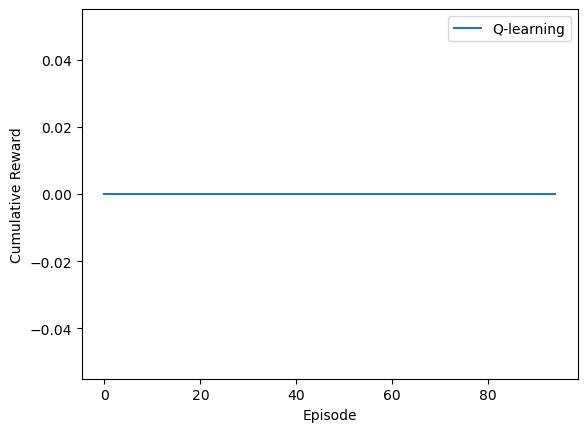

In [152]:
import numpy as np
import matplotlib.pyplot as plt
# Plotting
plt.plot(cumulative_Q[5:499], label='Q-learning')
# plt.plot(cumulative_Sarsa, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)


(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)
(152, 48)
(152, 49)
(151, 49)
(151, 48)


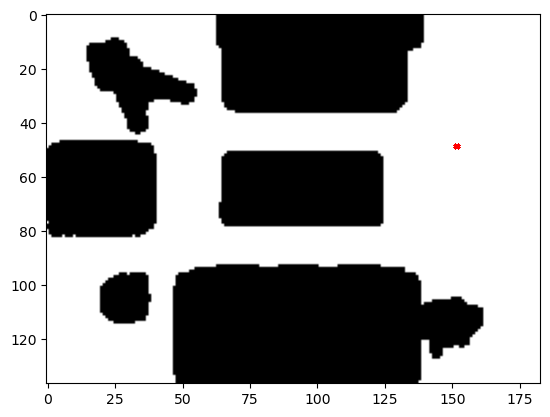

In [153]:
fig,ax = plt.subplots(1)
ax.imshow(image, cmap="gray")
state = start
count_path = 0
while state != goal and count_path < 1000:
    action_index = np.argmax(Q[state[0], state[1]])
    action = actions[action_index]
    print(state)
    next_state, reward = step(state, action)
    state = next_state
    plt.scatter(state[0],state[1], marker="x", color="red", s=2)
    count_path +=1

plt.show()

    